# Alzheimer Classification

## Imports & Set Variables

### Import Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import math
import warnings
warnings.filterwarnings('ignore')
tf.version

<module 'tensorflow._api.v2.version' from 'c:\\Users\\icycr\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

### Unzip Data

In [3]:
PATH = 'AlzheimersData'

modelCheckpoints_dir = os.path.join(PATH, "ModelCheckpoints")
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')
val_dir = os.path.join(PATH, 'validation')

### Set Variables

In [16]:
BATCH_SIZE = 32
EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

def count_files(direct):
    counts = []
    for subfolder in os.listdir(direct):
        subfolder_path = os.path.join(direct, subfolder)
        if os.path.isdir(subfolder_path):
            file_count = len([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))])
            counts.append(file_count)
    return counts
TOTAL_TRAIN_DATA = sum(count_files(train_dir))
TOTAL_VAL_DATA = sum(count_files(test_dir))
TOTAL_TEST_DATA = sum(count_files(val_dir))
print(TOTAL_TRAIN_DATA, TOTAL_VAL_DATA, TOTAL_TEST_DATA)

def gcd(arr, i): 
    if i == len(arr) - 1: 
        return arr[i] 
        
    a = arr[i] 
    b = gcd(arr,i + 1) 
      
    return math.gcd(a, b) 

27188 6400 6797


## Build and Train Model

### Create Image Scanners and Batchers

In [19]:
train_image_generator = ImageDataGenerator(rescale=1./300)
val_image_generator = ImageDataGenerator(rescale=1./300)
test_image_generator = ImageDataGenerator(rescale=1./300)


train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           batch_size = BATCH_SIZE,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'categorical')
val_data_gen = val_image_generator.flow_from_directory(val_dir,
                                                       batch_size = BATCH_SIZE,
                                                       target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode = 'categorical')
test_data_gen = test_image_generator.flow_from_directory(test_dir,
                                                         batch_size = BATCH_SIZE,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode = None,
                                                         shuffle = False)

for data_batch in test_data_gen:
    print('IMG Shape:', data_batch.shape[1:])
    break

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.
IMG Shape: (150, 150, 3)


### Display Images

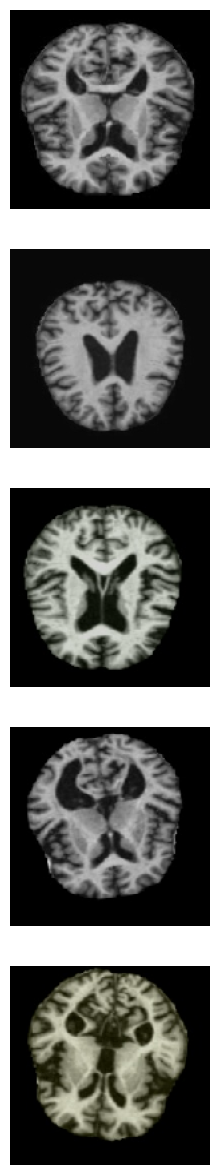

In [21]:
def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    for img, ax in zip( images_arr, axes):
      ax.imshow(img)
      ax.axis('off')

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

## Build and Train Model

### Build Model

In [46]:
model = keras.Sequential()
model.add(layers.Input((150, 150, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,404 (1.38 MB)

 Trainable params: 362,404 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

### Train Model

In [47]:
history = model.fit(train_data_gen, epochs=EPOCHS, steps_per_epoch=TOTAL_TRAIN_DATA//BATCH_SIZE, validation_data=val_data_gen, validation_steps=TOTAL_VAL_DATA//BATCH_SIZE)

Epoch 1/15
849/849 ━━━━━━━━━━━━━━━━━━━━ 29860s 35s/step - accuracy: 0.3938 - loss: 1.2024 - val_accuracy: 0.6483 - val_loss: 0.7228
Epoch 2/15
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5625 - loss: 0.8898 - val_accuracy: 0.7146 - val_loss: 0.6743
Epoch 3/15
849/849 ━━━━━━━━━━━━━━━━━━━━ 563s 663ms/step - accuracy: 0.7205 - loss: 0.6016 - val_accuracy: 0.7584 - val_loss: 0.5589
Epoch 4/15
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8125 - loss: 0.4230 - val_accuracy: 0.8081 - val_loss: 0.4875
Epoch 5/15
849/849 ━━━━━━━━━━━━━━━━━━━━ 564s 664ms/step - accuracy: 0.8123 - loss: 0.4330 - val_accuracy: 0.8323 - val_loss: 0.4124
Epoch 6/15
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8125 - loss: 0.4393 - val_accuracy: 0.8157 - val_loss: 0.4567
Epoch 7/15
849/849 ━━━━━━━━━━━━━━━━━━━━ 561s 660ms/step - accuracy: 0.8631 - loss: 0.3282 - val_accuracy: 0.8403 - val_loss: 0.3868
Epoch 8/15
849/849 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.2976 - 

### Load Saved Model

In [19]:
model = tf.keras.models.load_model(os.path.join(PATH, 'ModelCheckpoints', 'model.keras'))

### Plot Model Performance

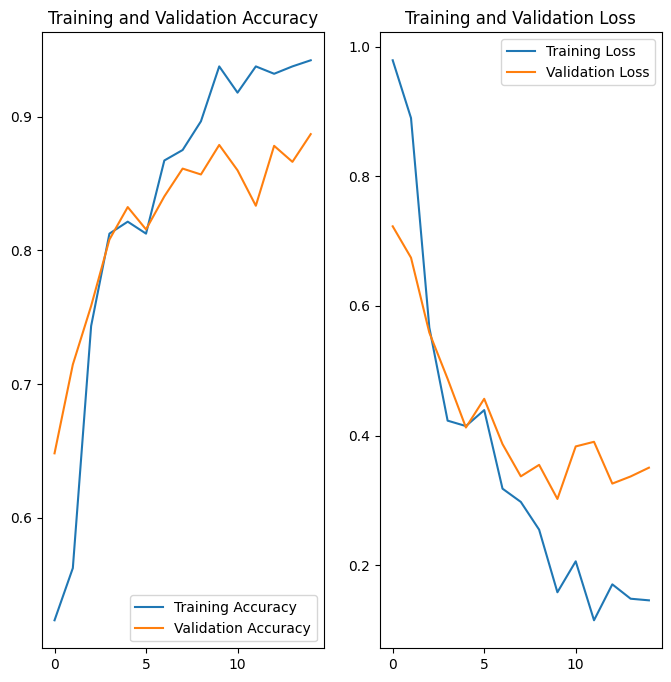

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Look at Predictions

In [49]:
predictions = model.predict(test_data_gen, steps=len(test_data_gen), verbose=1)
print(predictions[:5])

200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 250ms/step
[[1.0000000e+00 4.1571913e-14 3.0842266e-11 2.6813916e-15]
 [1.0000000e+00 1.0625596e-11 2.5863521e-08 5.3304947e-09]
 [1.0000000e+00 4.1836833e-12 5.7534075e-11 2.3538237e-15]
 [1.0000000e+00 8.2598147e-12 1.3928580e-08 3.4883905e-09]
 [1.0000000e+00 1.8830106e-11 1.1573706e-11 4.4508834e-16]]


## Testing Model

### Prediction Functions

In [20]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img
def getPrediction(preds):
    pred_key = ['MildDemented', 'Demented', 'NonDemented', 'VeryMildDemented']
    prediction = np.argmax(preds)
    return pred_key[prediction]
def predict(img_path):
    input_image = preprocess_image(img_path)
    pred = model.predict(input_image)
    prediction = getPrediction(pred)

    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Prediction: ' + prediction)
    plt.axis('off')
    plt.show()

    print(f'Actual: {os.path.abspath(img_path).split("\\")[-2]}')
    print(img_path)

    return prediction

### Predict Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


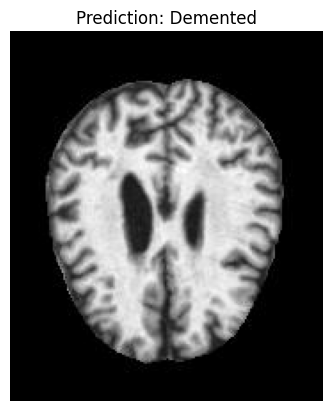

Actual: Demented
AlzheimersData/test\Demented\Demented0303.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


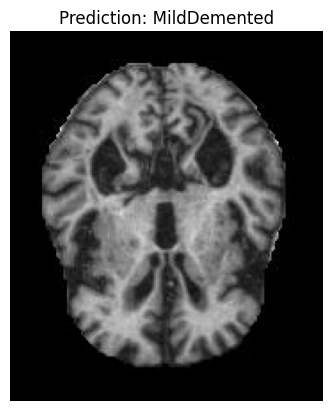

Actual: MildDemented
AlzheimersData/test\MildDemented\mildDem60.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


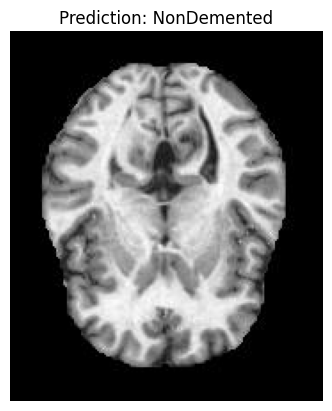

Actual: NonDemented
AlzheimersData/test\NonDemented\nonDem434.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


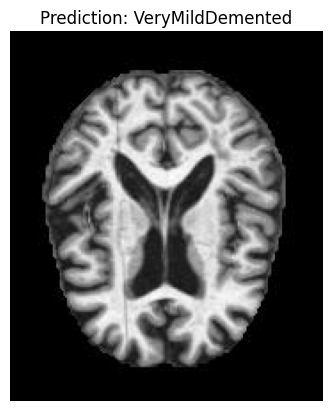

Actual: VeryMildDemented
AlzheimersData/test\VeryMildDemented\verymildDem1306.jpg


In [21]:
directories = os.listdir('AlzheimersData/test')[1:]
for i in range(len(directories)):
    directories[i] = os.path.join('AlzheimersData/test', directories[i])
for directory in directories:
    img_path = os.path.join(directory, random.choice(os.listdir(directory)))
    predict(img_path)

## Save Model Weights

In [58]:
model.save('model.keras')